# Taller gradiente descendente

## Nombre Michelle Y Brayan

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
import math
from matplotlib import pyplot as plt

Carga de datos base:

In [2]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

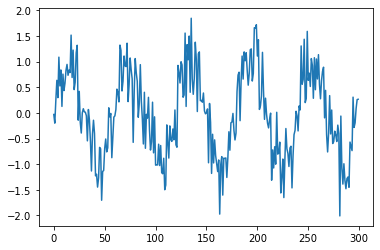

In [3]:
plt.plot(t)
plt.show()
plt.ion()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

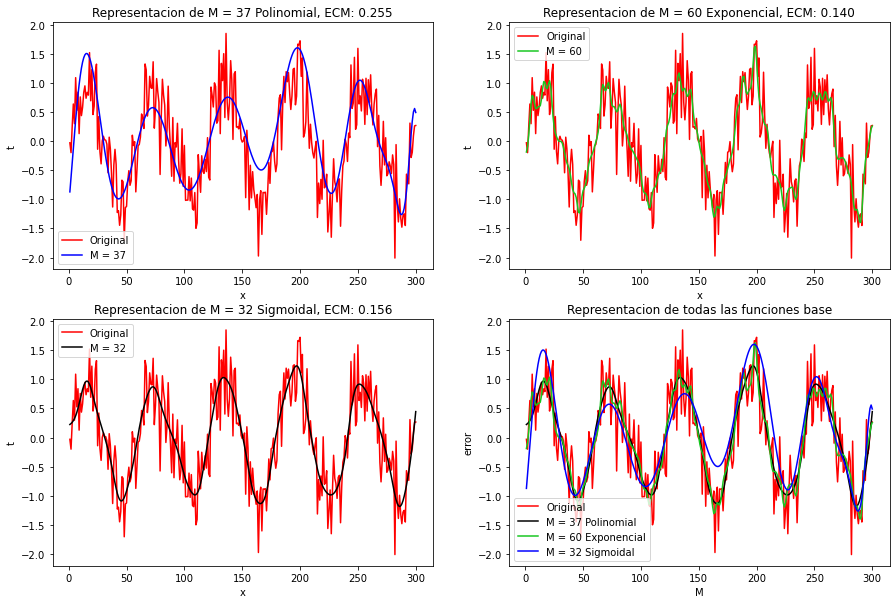

In [14]:
def generarPhi(x, m, f):
    s1 = 0.007
    s2 = 0.01
    val = np.arange(m)
    u=np.linspace(0,1,m)
    phi= np.arange(0,len(t),1)
    phi2= np.linspace(0,1,len(t))
    phiF = np.ones((len(x), len(val)),dtype=np.float64)
    for i in range(0, len(x), 1):
        for j in range(1, len(val), 1):
            if(f == 'p'):
                phiF[i,j] = phi2[i]**val[j]
            if(f == 'e'):
                phiF[i, j] = math.exp(-(((phi2[i]-u[j])**2)/(2*s1**2)))
            if(f == 's'):
                a=(phi2[i]-u[j])/s2
                phiF[i, j] = 1/(1+math.exp(-a))
     
    return phiF

def CalcularW(phi):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.linalg.inv(phi.T@phi)@phi.T@t1

def errorCuadraticoMedio(phi,w):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.mean(((phi@w)-t1)**2)

#Valores de M

m1=37
m2=60
m3=32

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

wPoli = CalcularW(phiPoli)
wExpo = CalcularW(phiExpo)
wSigmo = CalcularW(phiSigmo)


tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo

errorPoli=errorCuadraticoMedio(phiPoli,wPoli)
errorExpo=errorCuadraticoMedio(phiExpo,wExpo)
errorSigmo=errorCuadraticoMedio(phiSigmo,wSigmo)

t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

plt.subplots(2,2,figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(t1,t,'r',t1,tpPoli,'b')
plt.legend(['Original',names[0]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorPoli))

plt.subplot(2,2,2)
plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
plt.legend(['Original',names[1]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorExpo))


plt.subplot(2,2,3)
plt.plot(t1,t,'r',t1,tpSigmo,'k')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorSigmo))


plt.subplot(2,2,4)
plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
plt.xlabel("M")
plt.ylabel("error")
plt.title("Representacion de todas las funciones base")

plt.show()


-En la función polinomial con un M = 37 se aprecia un comportamiento similar en algunos picos de t sin mucha consistencia. Adicionalmente se aprecia un sobre ajuste en el tercer pico.

-En la función exponencial con un M = 60 se aprecia un comportamiento mejorado con respecto a la función   polinomial en cuanto a similitud, sin embargo, se aprecia un mayor sobreajuste además de poca suavidad en la fórma de la gráfica.

-En la función Sigmoidal con un M = 32 se aprecia un comportamiento similar a t con un trazo más suave que la función exponencial y con picos más consistentes, asemejándose más a la función seno. No se aprecia sobre ajuste más allá del segundo pico.

-Considerando las funciones anteriores, se elige el M = 32 como el más apropiado debido a su acercamiento a la función sin recaer en el sobreajuste con respecto a t.

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

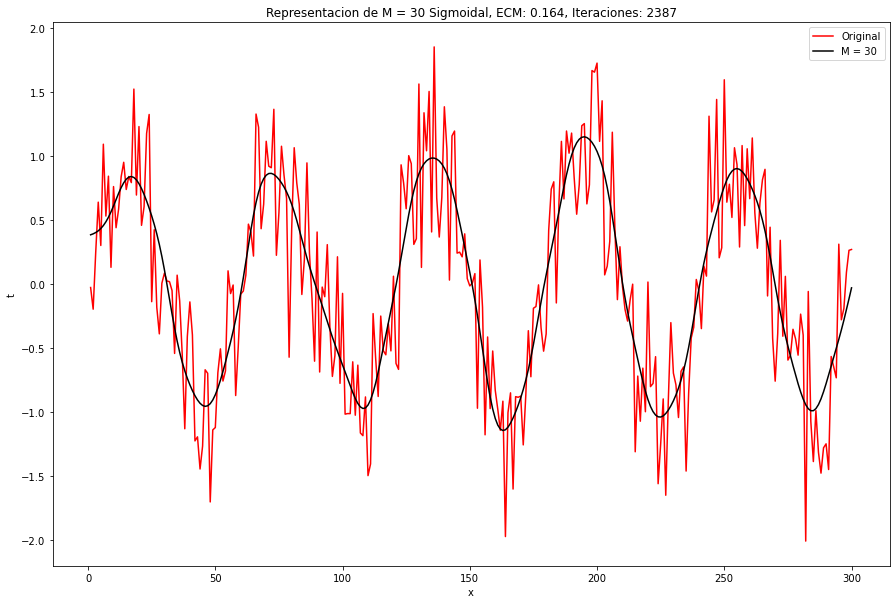

In [5]:
def calcularWGradiente(w,m,phi, errEsperado, aprendizaje, iteraciones):
    t1=np.array(t)
    tP=phi@w
    errActual=errorCuadraticoMedio(phi,w)    
    i=0
    while errEsperado<errActual and  i<iteraciones:
        for j in range(m):
            w[j]=w[j]-aprendizaje*calcularDelta(tP[:,0],t1,phi[:,j])        
        tP=phi@w
        errActual=errorCuadraticoMedio(phi,w)
        #print(errActual)        
        i+=1   
    return i,w

    
def calcularDelta(tP,t1,phi):
    return np.mean((tP-t1)*phi)

def generarInicioW(aleatorio, tamano, numero):
    if not aleatorio:
        return np.full((tamano,1),numero)
    return np.random.random((tamano,1))

#Valores de M

m1=30
m2=60
m3=30

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

#Generar las w Iniciales
w1=generarInicioW(True,m1,1)
w2=generarInicioW(True,m2,1)
w3=generarInicioW(True,m3,1)

canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,0.1,0.1,20000)
canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,0.1,0.1,40000)
canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,0.164,0.1,20000)

tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo


t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

#Visualizar gráfica

plt.subplots(1,1,figsize=(15,10))

plt.subplot(1,1,1)
plt.plot(t1,t,'r',t1,tpSigmo,'k')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiSigmo,wSigmo))
          +", Iteraciones: "+str(canSigmo))

plt.show()

# plt.subplots(2,2,figsize=(15,10))

# plt.subplot(2,2,1)
# plt.plot(t1,t,'r',t1,tpPoli,'b')
# plt.legend(['Original',names[0]])
# plt.xlabel("x")
# plt.ylabel("t")
# plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiPoli,wPoli))
#           +", Iteraciones: "+str(canPoli))

# plt.subplot(2,2,2)
# plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
# plt.legend(['Original',names[1]])
# plt.xlabel("x")
# plt.ylabel("t")
# plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiExpo,wExpo))
#           +", Iteraciones: "+str(canExpo))


# plt.subplot(2,2,3)
# plt.plot(t1,t,'r',t1,tpSigmo,'k')
# plt.legend(['Original',names[2]])
# plt.xlabel("x")
# plt.ylabel("t")
# plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiSigmo,wSigmo))
#           +", Iteraciones: "+str(canSigmo))


# plt.subplot(2,2,4)
# plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
# plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
# plt.xlabel("M")
# plt.ylabel("error")
# plt.title("Representacion de todas las funciones base")

# plt.show()

4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

In [6]:
def graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names ):
    
    plt.ion()
    plt.subplots(2,2,figsize=(15,10))

    plt.subplot(2,2,1)
    plt.plot(t1,t,'r',t1,tpPoli,'b')
    plt.legend(['Original',names[0]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorPoliG)
              +", Iteraciones: "+str(canPoli))

    plt.subplot(2,2,2)
    plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
    plt.legend(['Original',names[1]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorExpoG)
              +", Iteraciones: "+str(canExpo))


    plt.subplot(2,2,3)
    plt.plot(t1,t,'r',t1,tpSigmo,'k')
    plt.legend(['Original',names[2]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorSigmoG)
              +", Iteraciones: "+str(canSigmo))


    plt.subplot(2,2,4)
    plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
    plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
    plt.xlabel("M")
    plt.ylabel("error")
    plt.title("Representacion de todas las funciones base")

    plt.show()

    print("Error Cuadrados Polinomial: "+str(errorPoli))
    print("Error Gradiente Polinomial: "+str(errorPoliG))
    print("Diferencia Polinomial: "+str(errorPoliG-errorPoli))
    print("Error Cuadrados Exponencial: "+str(errorExpo))
    print("Error Gradiente Exponencial: "+str(errorExpoG))
    print("Diferencia Exponencial: "+str(errorExpo-errorExpoG))
    print("Error Cuadrados Sigmoidal: "+str(errorSigmo))
    print("Error Gradiente Sigmoidal: "+str(errorSigmoG))
    print("Diferencia Sigmoidal: "+str(errorSigmo-errorSigmoG))
    

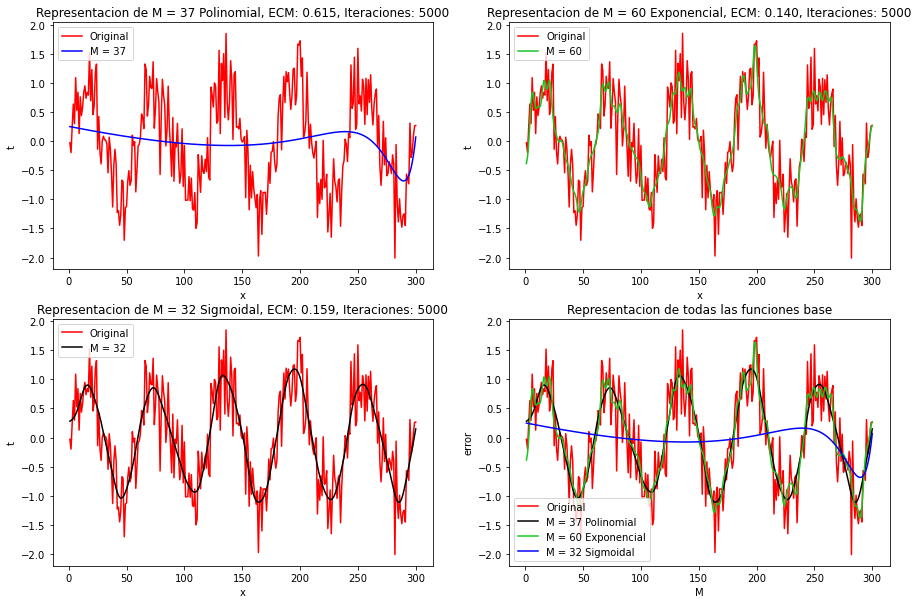

Error Cuadrados Polinomial: 0.25506243102771164
Error Gradiente Polinomial: 0.614766574039466
Diferencia Polinomial: 0.35970414301175435
Error Cuadrados Exponencial: 0.13958780567924356
Error Gradiente Exponencial: 0.14000804704607547
Diferencia Exponencial: -0.0004202413668319138
Error Cuadrados Sigmoidal: 0.156027907912739
Error Gradiente Sigmoidal: 0.15918102543708842
Diferencia Sigmoidal: -0.003153117524349436


In [7]:
#Valores de M

m1=37
m2=60
m3=32

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

#Generar las w Iniciales
w1=generarInicioW(True,m1,1)
w2=generarInicioW(True,m2,1)
w3=generarInicioW(True,m3,1)

canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,errorPoli+0.000,0.1,5000)
canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,errorExpo+0.000,0.2,5000)
canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,errorSigmo+0.000,0.1,5000)

tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo

errorPoliG=errorCuadraticoMedio(phiPoli,wPoli)
errorExpoG=errorCuadraticoMedio(phiExpo,wExpo)
errorSigmoG=errorCuadraticoMedio(phiSigmo,wSigmo)

t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names)

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)

In [8]:
def normalizar(phi):
    phi=np.delete(phi, 0, 1)
    maxi = phi.min()
    mini = phi.max()
    phi = (phi - mini)/(maxi - mini)
    return np.concatenate((np.ones((np.shape(phi)[0],1)),phi),axis=1)

/home/michelle/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-4-5259007d5bb0>:29: RuntimeWarning: overflow encountered in square
  return np.mean(((phi@w)-t1)**2)
<ipython-input-5-d909a5843d1b>:9: RuntimeWarning: invalid value encountered in matmul
  tP=phi@w
<ipython-input-4-5259007d5bb0>:29: RuntimeWarning: invalid value encountered in matmul
  return np.mean(((phi@w)-t1)**2)
<ipython-input-9-a413d7d2fe45>:30: RuntimeWarning: invalid value encountered in matmul
  tpPoli=phiPoli@wPoli


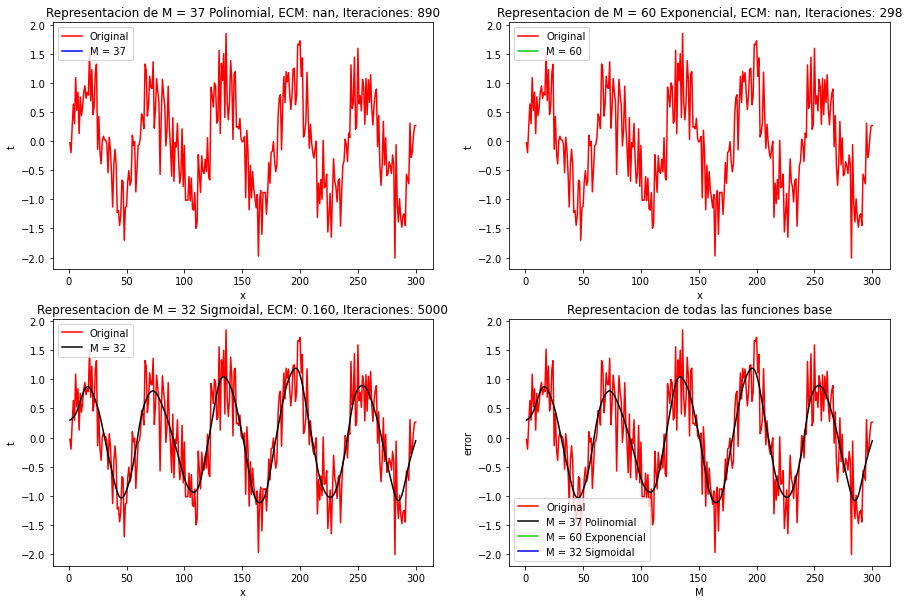

Error Cuadrados Polinomial: 0.25506243102771164
Error Gradiente Polinomial: nan
Diferencia Polinomial: nan
Error Cuadrados Exponencial: 0.13958780567924356
Error Gradiente Exponencial: nan
Diferencia Exponencial: nan
Error Cuadrados Sigmoidal: 0.156027907912739
Error Gradiente Sigmoidal: 0.16046425748679358
Diferencia Sigmoidal: -0.004436349574054588


In [9]:

    #Valores de M

    m1=37
    m2=60
    m3=32

    #Graficación------------------------------------------------

    names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])

    #Calcular Predicción
    phiPoli1 = generarPhi(x, m1, 'p')
    phiExpo1 = generarPhi(x, m2, 'e')
    phiSigmo1 = generarPhi(x, m3, 's')

    #Normalizar la predicción
    phiPoli = normalizar(phiPoli1)
    phiExpo = normalizar(phiExpo1)
    phiSigmo = normalizar(phiSigmo1)

    #Generar las w Iniciales
    w1=generarInicioW(True,m1,1)
    w2=generarInicioW(True,m2,1)
    w3=generarInicioW(True,m3,1)

    canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,errorPoli+0.000,0.1,5000)
    canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,errorExpo+0.000,0.2,5000)
    canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,errorSigmo+0.000,0.1,5000)

    tpPoli=phiPoli@wPoli
    tpExpo=phiExpo@wExpo
    tpSigmo=phiSigmo@wSigmo

    errorPoliG=errorCuadraticoMedio(phiPoli,wPoli)
    errorExpoG=errorCuadraticoMedio(phiExpo,wExpo)
    errorSigmoG=errorCuadraticoMedio(phiSigmo,wSigmo)

    t0=np.arange(1,len(t)+1,1)
    t1=t0.reshape(len(t0),1)

    graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names)